In [21]:
%reload_ext nb_black
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import normaltest
from scipy.stats import boxcox

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

postgres_user = "dsbc_student"
postgres_pw = "7*.8G9QH21"
postgres_host = "142.93.121.174"
postgres_port = "5432"
postgres_db = "useducation"

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
def missingness_summary(df, print_log=False, sort='none'):
    summary = df.apply(lambda x: x.isna().sum() / x.shape[0])
    
    if print_log == True:
        if sort == 'none':
            print(summary)
        elif sort == 'ascending':
            print(summary.sort_values())
        elif sort == 'descending':
            print(summary.sort_values(ascending=False))
        else:
            print('Invalid value for sort parameter.')
        
    return summary

In [2]:
engine = create_engine(
    "postgresql://{}:{}@{}:{}/{}".format(
        postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db
    )
)

useducation_df = pd.read_sql_query("select * from useducation", con=engine)

# no need for an open connection,
# as we're only doing a single query
engine.dispose()

<IPython.core.display.Javascript object>

In [50]:
useducation_df["GRADES_8_G"].sum() - useducation_df["GRADES_4_G"].sum()

-417725.0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
# useducation_df.head()
useducation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   1492 non-null   object 
 1   STATE                         1492 non-null   object 
 2   YEAR                          1492 non-null   int64  
 3   ENROLL                        1229 non-null   float64
 4   TOTAL_REVENUE                 1280 non-null   float64
 5   FEDERAL_REVENUE               1280 non-null   float64
 6   STATE_REVENUE                 1280 non-null   float64
 7   LOCAL_REVENUE                 1280 non-null   float64
 8   TOTAL_EXPENDITURE             1280 non-null   float64
 9   INSTRUCTION_EXPENDITURE       1280 non-null   float64
 10  SUPPORT_SERVICES_EXPENDITURE  1280 non-null   float64
 11  OTHER_EXPENDITURE             1229 non-null   float64
 12  CAPITAL_OUTLAY_EXPENDITURE    1280 non-null   float64
 13  GRA

<IPython.core.display.Javascript object>

In [2]:
useducation_df.isna().sum()

NameError: name 'houseprices_df' is not defined

In [5]:
useducation_df = useducation_df.interpolate(method="nearest")

<IPython.core.display.Javascript object>

In [6]:
useducation_df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,208.327876,252.187522,207.963517,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,264.619665


<IPython.core.display.Javascript object>

In [7]:
useducation_df.isna().sum()

PRIMARY_KEY                       0
STATE                             0
YEAR                              0
ENROLL                          242
TOTAL_REVENUE                   206
FEDERAL_REVENUE                 206
STATE_REVENUE                   206
LOCAL_REVENUE                   206
TOTAL_EXPENDITURE               206
INSTRUCTION_EXPENDITURE         206
SUPPORT_SERVICES_EXPENDITURE    206
OTHER_EXPENDITURE               242
CAPITAL_OUTLAY_EXPENDITURE      206
GRADES_PK_G                      46
GRADES_KG_G                      45
GRADES_4_G                       45
GRADES_8_G                       45
GRADES_12_G                      45
GRADES_1_8_G                     45
GRADES_9_12_G                    45
GRADES_ALL_G                     46
AVG_MATH_4_SCORE                  0
AVG_MATH_8_SCORE                  0
AVG_READING_4_SCORE               0
AVG_READING_8_SCORE               1
dtype: int64

<IPython.core.display.Javascript object>

In [8]:
useducation_df = useducation_df.interpolate()

<IPython.core.display.Javascript object>

In [9]:
useducation_df.isna().sum()

PRIMARY_KEY                      0
STATE                            0
YEAR                             0
ENROLL                          36
TOTAL_REVENUE                    0
FEDERAL_REVENUE                  0
STATE_REVENUE                    0
LOCAL_REVENUE                    0
TOTAL_EXPENDITURE                0
INSTRUCTION_EXPENDITURE          0
SUPPORT_SERVICES_EXPENDITURE     0
OTHER_EXPENDITURE               36
CAPITAL_OUTLAY_EXPENDITURE       0
GRADES_PK_G                      0
GRADES_KG_G                      0
GRADES_4_G                       0
GRADES_8_G                       0
GRADES_12_G                      0
GRADES_1_8_G                     0
GRADES_9_12_G                    0
GRADES_ALL_G                     0
AVG_MATH_4_SCORE                 0
AVG_MATH_8_SCORE                 0
AVG_READING_4_SCORE              0
AVG_READING_8_SCORE              1
dtype: int64

<IPython.core.display.Javascript object>

In [10]:
useducation_df = useducation_df.fillna(method="backfill")

<IPython.core.display.Javascript object>

In [11]:
useducation_df.isna().sum()
# not the best nan handling, lots of ambiguous filling

PRIMARY_KEY                     0
STATE                           0
YEAR                            0
ENROLL                          0
TOTAL_REVENUE                   0
FEDERAL_REVENUE                 0
STATE_REVENUE                   0
LOCAL_REVENUE                   0
TOTAL_EXPENDITURE               0
INSTRUCTION_EXPENDITURE         0
SUPPORT_SERVICES_EXPENDITURE    0
OTHER_EXPENDITURE               0
CAPITAL_OUTLAY_EXPENDITURE      0
GRADES_PK_G                     0
GRADES_KG_G                     0
GRADES_4_G                      0
GRADES_8_G                      0
GRADES_12_G                     0
GRADES_1_8_G                    0
GRADES_9_12_G                   0
GRADES_ALL_G                    0
AVG_MATH_4_SCORE                0
AVG_MATH_8_SCORE                0
AVG_READING_4_SCORE             0
AVG_READING_8_SCORE             0
dtype: int64

<IPython.core.display.Javascript object>

In [12]:
useducation_df["AVG_SCORE_WTD"] = (
    useducation_df["AVG_MATH_4_SCORE"] * useducation_df["GRADES_4_G"]
    + useducation_df["AVG_MATH_8_SCORE"] * useducation_df["GRADES_8_G"]
    + useducation_df["AVG_READING_4_SCORE"] * useducation_df["GRADES_4_G"]
    + useducation_df["AVG_READING_8_SCORE"] * useducation_df["GRADES_8_G"]
) / (useducation_df["GRADES_4_G"] * 2 + useducation_df["GRADES_8_G"] * 2)

<IPython.core.display.Javascript object>

In [13]:
useducation_df["AVG_SCORE_WTD"].corrwith(useducation_df[''])

0       231.850385
1       230.609124
2       235.639070
3       235.441283
4       230.547249
           ...    
1487    258.746848
1488    254.341566
1489    248.522644
1490    250.689122
1491    257.213610
Name: AVG_SCORE_WTD, Length: 1492, dtype: float64

<IPython.core.display.Javascript object>

In [17]:
usedu_expend = useducation_df[
    [
        "INSTRUCTION_EXPENDITURE",
        "SUPPORT_SERVICES_EXPENDITURE",
        "OTHER_EXPENDITURE",
        "AVG_SCORE_WTD",
    ]
]

<IPython.core.display.Javascript object>

In [18]:
usedu_expend.corr()

,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,AVG_SCORE_WTD
INSTRUCTION_EXPENDITURE,1.000000,0.979331,0.916577,0.182058
SUPPORT_SERVICES_EXPENDITURE,0.979331,1.000000,0.949447,0.198161
OTHER_EXPENDITURE,0.916577,0.949447,1.000000,0.168584
AVG_SCORE_WTD,0.182058,0.198161,0.168584,1.000000


<IPython.core.display.Javascript object>

While all correlations are low, support services expenditure has the highest correlation at 0.2. Low, but not marginal.

3. PCA

In [23]:
X = usedu_expend.drop(labels="AVG_SCORE_WTD", axis=1)
y = usedu_expend["AVG_SCORE_WTD"]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [28]:
scaler = StandardScaler()

scaler.fit(X)

scaled_X = pd.DataFrame(scaler.transform(X), columns=X.columns)

print("Feature variances after scaling:")
print(scaled_X.var().sort_values(ascending=False).head())

Feature variances after scaling:
SUPPORT_SERVICES_EXPENDITURE    1.000671
OTHER_EXPENDITURE               1.000671
INSTRUCTION_EXPENDITURE         1.000671
dtype: float64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

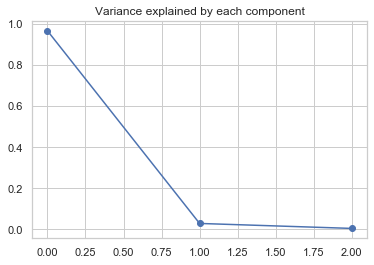

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [29]:
pca = PCA()

pca.fit(scaled_X)

plt.plot(pca.explained_variance_ratio_, marker="o")
plt.title("Variance explained by each component")
plt.show()

It appears almost all of the variance is explained by the first component

In [31]:
dir(pca)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_fit',
 '_fit_full',
 '_fit_svd_solver',
 '_fit_truncated',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 'components_',
 'copy',
 'explained_variance_',
 'explained_variance_ratio_',
 'fit',
 'fit_transform',
 'get_covariance',
 'get_params',
 'get_precision',
 'inverse_transform',
 'iterated_power',
 'mean_',
 'n_components',
 'n_components_',
 'n_features_',
 'n_samples_',
 'noise_variance_',
 'random_state',
 'score',
 'score_samples',
 'set_params',
 'singular_values_',
 'svd_solver',
 'tol',
 'transform',
 'whiten']

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [45]:
usedu_expend["AVG_SCORE_WTD"].corr(pca.singular_values_)

TypeError: unsupported type: <class 'numpy.ndarray'>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [44]:
pca.singular_values_

array([65.74590308, 11.4379926 ,  4.75904962])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

5. If you were to choose the best variables for your model, would you prefer using the 1st principal component instead of the expenditure variables? Why?